# Tarea 1

In [2]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

# Problema 1

In [4]:

#Funcion amnesia, recibe un vector x numerico
#Dos numeros t,s>0
#Regresa |P(X>s)-P(X>t+s|X>t)|

amnesia <- function(x,t,s){
    p_s <- length(x[x>s])/length(x) # P(X>s)
    n_s <- length(x[x>t])           # Número de elementos en X tal que X>t
    p_ts <- length(x[x>t+s])/n_s    #P(X>t+s|X>t)
    return (abs(p_s-p_ts))
    
}

In [13]:

X <- rexp(100,1)#Muestra aleatoria de 100 observaciones
Y <- rexp(1000000,1)#Muestra aleatoria de 1000 observaciones
t <- 0.5
s <- 2

In [14]:
#Para una muestra con 100 observaciones
amnesia(X,t,s)

[1] 0.01873016

In [15]:
#Para una muestra con 1000,000 observaciones
amnesia(Y,t,s)

[1] 0.0004075498

Para ninguna de las dos muestras $\mathbb{P}(X>t+s|X>t)=\mathbb{P}(X>s)$.

Sin embargo, la muestra con 1000,000 de observaciones tiene un error menor.

A continuación la solución exacta:
$\mathbb{P}(X>s)= 1-\mathbb{P}(X\leq s) = 1-F_{x}(s)$

In [18]:
#Probabilidad real
1-pexp(s,1)

[1] 0.1353353

In [19]:
#Probabilidad dada por la muestra de tamaño 100
length(X[X>s])/length(X)

[1] 0.14

In [20]:
#Probabilidad dada por la muestra tamaño 1000,000
length(Y[Y>s])/length(Y)

[1] 0.135586

Es mejor la aproximación dada por la muestra de tamaño 1000,000.

# Problema 2 

In [24]:
usePackage('Rlab')

package 'Rlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\itzam\AppData\Local\Temp\RtmpmOjMk4\downloaded_packages


In [30]:
#Generamos 500 observaciones bernoulli con p = 1/2
#Asociamos un 1 al éximo "cae sol en el lanzamiento de la moneda"
N <- 500
x <- rbern(N, 0.5)
#Calculamos ahora la proporcion de soles en cada tiro
proporcion_soles <- cumsum(x)/1:N

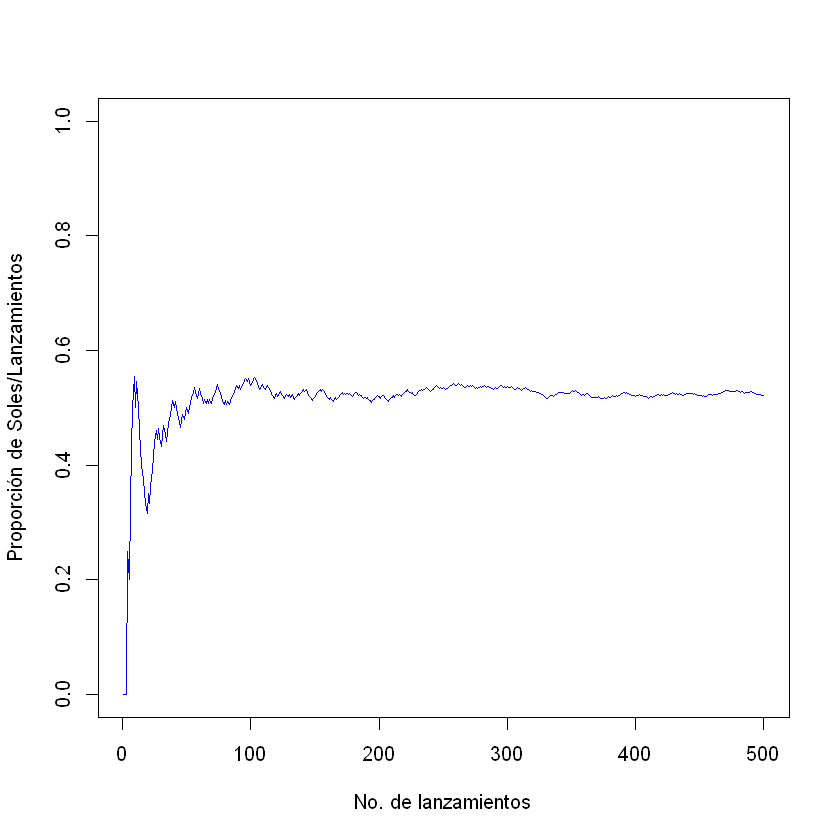

In [35]:
#Realizamos la gráfica
plot(1:N,proporcion_soles,type = 'l',ylim =c(0,1),xlab = 'No. de lanzamientos',
     ylab = 'Proporción de Soles/Lanzamientos',col = 'blue')

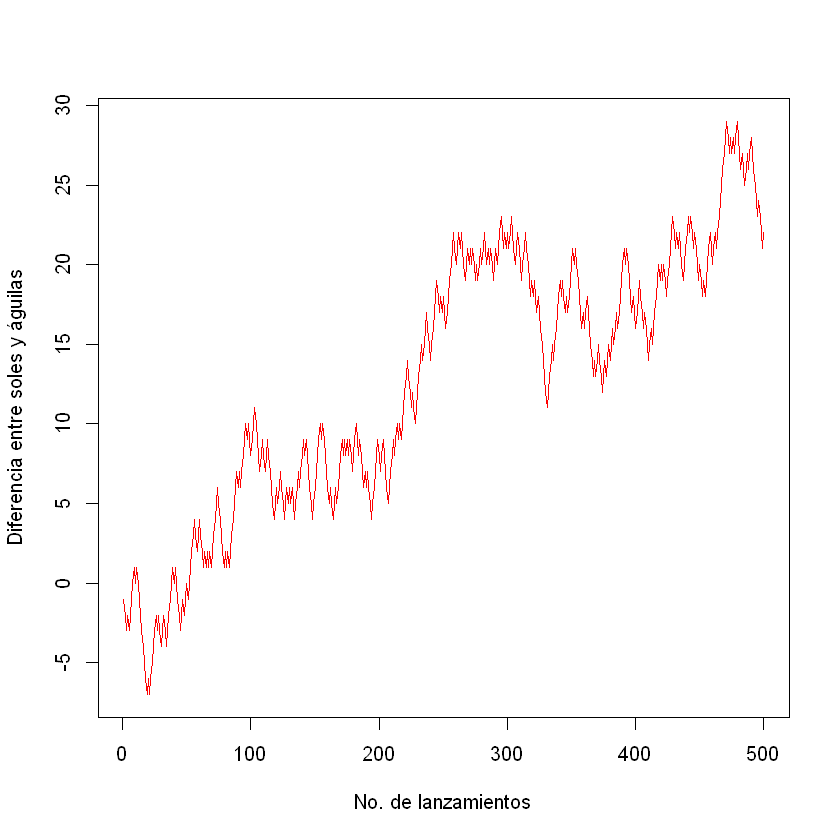

In [38]:
#Calculemos ahora la diferencia entre soles y águilas
difsoles_aguilas <- 2*cumsum(x)-1:N
#Realizamos la gráfica
plot(1:N,difsoles_aguilas,type = 'l',xlab = 'No. de lanzamientos',
     ylab = 'Diferencia entre soles y águilas',col = 'red')